### Primer control de la parte práctica de Ampliación de matemáticas

Curso: 2020-2021

Responde escribiendo tu código en el cuaderno.Puedes añadir cuantas celdas necesites. Puedes añadir celdas de texto y redactar partes si quieres. Sólo se evaluará lo que quede escrito en el cuaderno. Cada ejercicio vale cinco puntos. Cada pregunta vale un punto. 

### Ejercicio 1

Se considera la siguiente función:
$$
f_1(x) = \sin(x/10) + \dfrac{x^{8}}{20} 
$$

(a) Implementa el método de la secante para búsqueda de raíces. Tu función ha de incluir dos criterios de parada, uno basado en el número máximo de iteraciones (que será por defecto 120), y otro basado en la convergencia del valor de las sucesivas aproximaciones, $x_n, \; n=0,...$ a la raíz.

(b) ¿Cuantas raíces tiene la función $f_1(x)$ en el intervalo $[-1.5, 1]$ ? Obtenlas usando la función que acabas de programar. 

(c) Busca una función de scipy que implemente el método de la secante. Aplícala a este mismo caso y compara los tiempos de ejecución de esta función y la que has programado por tu cuenta. ¿Qué observas?

(d) Obtén numéricamente el orden de convergencia del método en la aproximación de la menor de las raíces de la función $f_1$. Utiliza como estimaciones iniciales $x_0 = -1.5$ y $x_1 = 1.0$ ¿Sabrías decir a qué número tiende el orden de convergencia?

(e) Existe un método conceptualmente similar al de la secante pero más complejo. Se trata del método de Muller, que interpola la función cuyas raíces queremos obtener mediante una parábola, en vez de utilizar una recta. El método de Muller responde al esquema
$$
x_{n+1} = x_n - g_{M}(x_n, x_{n-1}, x_{n-2}),
$$

En el caso de Muller, la función $g_{M}$ viene dada por
$$
g_M(x_n) := \dfrac{2 f(x_n)}{w_n \pm \sqrt{w_n^2 - 4 f(x_{n}) f[x_n, x_{n-1}, x_{n-2}]}}, 
$$
donde
$$
w_n = f[x_n, x_{n-1}] + f[x_n, x_{n-2}] - f[x_{n-1}, x_{n-2}],
$$
y $f(x)$ es la función cuyas raíces queremos aproximar. Observa que en el denominador hay un $\pm$. En cada iteración, comprobaremos que signo maximiza el valor absoluto del denominador de $g_M$, y escogeremos ese signo para calcular la siguiente aproximación de la raíz, $x_{n+1}$. Recuerda que $f[]$ representa una diferencia dividida.

Implementa el método de Muller y aplícalo a la ecuación anterior. Prueba con las siguientes estimaciones iniciales: $x_0 = -6, \; x_1 = -3, \; x_2 = -1$.

### Respuesta.

### Apartado (a)

Implementamos el método de la secante:

In [30]:
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import numpy as np
import time

In [4]:
def secante(f, a, b, xtol=1e-18, maxiter=120, show_order=0):
    
    x0 = a
    x1 = b
    roots = [x0, x1]
    errors = [np.inf, np.inf]
    ii = 0
    
    while errors[-1] > xtol and ii < maxiter:
       
        x_new = x1 - f(x1) * (x1 - x0)/(f(x1) - f(x0))
        roots.append(x_new)
        errors.append(np.abs(x_new - x1))
        if show_order:
            print(np.log(errors[-1])/np.log(errors[-2]))
        x0 = x1
        x1 = x_new
        
    return x_new, roots, errors

### Apartado (b)

Utilizamos el método de la secante para obtener las raíces de la función dada en el intervalo $[-1.5, 1]$

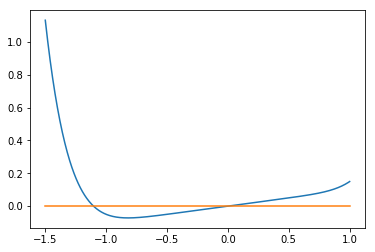

In [5]:
def f_1(x):
    return np.sin(x/10.) + x**8 / 20

x = np.linspace(-1.5, 1.0, 1000)
plt.plot(x, f_1(x))
plt.plot(x, np.zeros(len(x)))

In [36]:
tsec_1 = time.time()
r1, rs, errs = secante(f_1, -1.5, -1.0)
tsec_1 = time.time() - tsec_1 

tsec_2 = time.time()
r2, rs, errs = secante(f_1, 0.5, 1.0)
tsec_2 = time.time() - tsec_2

print("Raíz x_1 =", r1)
print("Raíz x_2 =", r2)

Raíz x_1 = -1.103769163499738
Raíz x_2 = 2.938735877055719e-39


### Apartado (c)

Utilizamos ahora funciones de la librería Scipy. 

In [37]:
print("Raíz x_1 =", r1)
print("Tiempo de ejecucion: ", tsec_1)
print("Raíz x_2 =", r2)
print("Tiempo de ejecucion: ", tsec_2)

print("- - "*10)
print("Ahora con scipy:")
tsec_1_np = time.time()
r1_np = opt.newton(f_1, -1.5)
tsec_1_np = time.time() - tsec_1_np

print("Raíz x_1 =", r1_np)
print("Tiempo de ejecucion: ", tsec_1_np)

tsec_2_np = time.time()
r2_np = opt.newton(f_1, 1.0)
tsec_2_np = time.time() - tsec_1_np

print("Raíz x_2 =", r2_np)
print("Tiempo de ejecucion: ", tsec_1_np)

Raíz x_1 = -1.103769163499738
Tiempo de ejecucion:  0.00021028518676757812
Raíz x_2 = 2.938735877055719e-39
Tiempo de ejecucion:  0.00012874603271484375
- - - - - - - - - - - - - - - - - - - - 
Ahora con scipy:
Raíz x_1 = -1.103769163499738
Tiempo de ejecucion:  0.0011248588562011719
Raíz x_2 = 1.3402880046472796e-22
Tiempo de ejecucion:  0.0011248588562011719


Se observa que la función prefabricada de la linbrería scipy es más lenta que la nuestra. Esto puede deberse a que la función de Scipy permite mucha variación de parámetros)(como opcción de elegir el método, etc), por lo que debe gestionarlos internamente y dar lugar a una función menos eficiente. La nuestra es más directa. 

### Apartado (d):

Obtenemos el orden de convergencia. Había un error en el enunciado, lo que pretendía es que usáseis $-1.5$ y $-1$, en vez de $1$. Dependiendo de los estimadores iniciales se obtiene un valor diferente del orden de convergencia. Usando los que os proponía se ve más claro que el orden tiende al número aúreo, como ocurre en general con la secante:

In [9]:
r1, rs, errs = secante(f_1, -1.5, -1., show_order=1)

-0.0
0.5299849958638295
1.3650373638516426
1.5746590400307963
1.366616727159548
1.490961736809854
1.5335154693870379
1.5589930073318843
1.5858932606066
inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


El orden de convergencia del método de la secante tiende al número aureo: 
https://es.wikipedia.org/wiki/N%C3%BAmero_%C3%A1ureo

### Apartado (e)

Programamos el método de Muller:

In [25]:
def Muller(f, x_0, x_1, x_2, tol=1e-18, maxiter=120, show_order=0):
   
    roots = [x_0, x_1, x_2]
    errors = [np.inf]
    jj = 0
    
    while errors[-1] > tol and jj < maxiter:
        
        f0 = f(x_0)
        f1 = f(x_1)
        f2 = f(x_2)
        
        f21 = (f1 - f2) / (x_1 - x_2)
        f20 = (f0 - f2) / (x_0 - x_2)
        f10 = (f0 - f1) / (x_0 - x_1)
   
        w  = f21 + f20 - f10
        fdiv = (f10 - f21) / (x_0 - x_2)
        
        den   = w + np.sqrt(w*w - 4. * f2 * fdiv)
        den_2 = w - np.sqrt(w*w - 4. * f2 * fdiv)
      
        if np.abs(den_2) > np.abs(den):
            den = den_2
            
        x_new = x_2 - 2 * f2 / den

        roots.append(x_new)
        errors.append(np.abs(x_new - x_2))
        
        if show_order:
            print( np.log(errors[-2]) / np.log(errors[-1]) )
        
        jj += 1
        x_0 = x_1
        x_1 = x_2
        x_2 = x_new
        
    return x_2, roots, errors

In [26]:
r, rs, e = Muller(f_1, -3, -1.5, -1., show_order=1)
print("la raíz es : ", r)

-inf
2.750550890752432
0.6919483397004355
0.5597753689534984
0.6066515022529995
0.5617210071663681
0.551750436580864
0.0
la raíz es :  -1.1037691634997377


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log


### Ejercicio 2

Del plano de formas de un velero se han extraído los siguientes valores de las semimangas de la línea de agua 6 para cada una de las 11 cuadernas equiespaciadas entre los piques, correspondiendo las cuadernas $0$ y $10$ a los piques de popa y proa respectivamente:
$$
c \;\;\; y_6 \\
---- \\
c_0: \; 1.50 \\ 
c_1: \; 1.62 \\
c_2: \; 1.73 \\
c_3: \; 1.77 \\
c_4: \; 1.75 \\
c_5: \; 1.70 \\
c_6: \; 1.55 \\
c_7: \; 1.30 \\
c_8: \; 0.90 \\
c_9: \; 0.47 \\
c_{10}: \; 0.0\\
$$
La línea de agua 8 puede obtenerse aplicando a cada semimanga de la línea de agua 6 la siguiente transformación:
$$
y_8(c) = y_6(c) + \dfrac{1}{10} + \dfrac{12 (c - 4)^2}{1000},
$$
siendo $c$ el número de la cuaderna. A modo de ejemplo, la semimanga en la cuaderna 5 de la línea de agua 8 vale:
$$
y_8(5) = 1.70 + \dfrac{1}{10} + \dfrac{12}{1000} = 1.812.
$$

(a) Dibuja las líneas de agua 6 y 8 de este velero. Utiliza el índice de cuaderna como variable independiente, y la semimanga como variable dependiente a la hora de dibujar la gráfica. 

(b) Interpola las semimangas de las líneas de agua 6 y 8 utilizando el polinomio interpolador, $P_N$, (puedes construirlo de la manera que prefieras). ¿Te parece adecuada la forma para una línea de agua? ¿A qué achacarías este fenómeno? Explícalo muy brevemente.  

(c) Interpola ahora las semimangas utilizando Splines cúbicas. Compara la nueva curva con las anteriores. ¿Qué método de interpolación te parece más adecuado para generar curvas correspondientes a geometrías de cascos a partir de información de puntos concretos?

(d) Para la línea de agua 6 únicamente, evalúa la interpolación con splines cúbicas en sendas cuadernas extras que se ubicarían entre las cuadernas $0$ y $1$ y las cuadernas $9$ y $10$ respectivamente. Estas cuadernas se denominan cuadernas un medio, $c_{1/2}$, y nueve medios, $c_{9/2}$. Se  utilizan a veces para definir la forma de los piques de proa y popa. Evalúa de nuevo el polinomio interpolador utilizando estos nodos extras. Evalúa el polinomio interpolador utilizando estos nuevos nodos además de los que tenías. ¿Ha mejorado la representación de la línea de agua respecto a la que vimos en el apartado (b)? Podrías relacionar ésto con alguno de los contenidos vistos en clase. Explícalo muy brevemente. 

(e) Obtén el área de la flotación de este barco integrando las semimangas de la línea de agua 6. Recuerda que debes multiplicar el resultado de la integración por dos para obtener el área total (¡estamos integrando semimangas, no mangas enteras!). Utiliza cualquiera de las reglas de cuadratura vistas en clase. 

### Solución

### Apartado (a)

Dibujamos las líneas de agua.

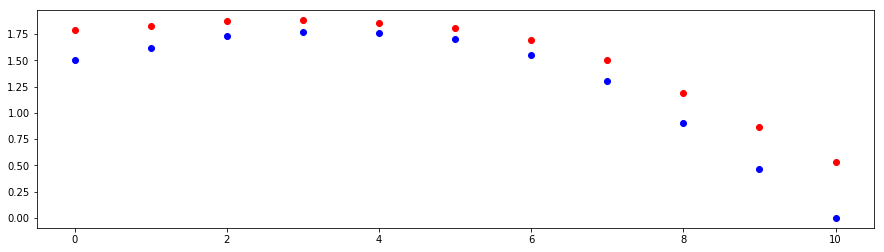

In [27]:
c   = np.arange(0,11,1)
y_6 = np.array([1.5, 1.62, 1.73, 1.77, 1.76, 1.7, 1.55, 1.3, 0.9, 0.47, 0.0])
y_8 = y_6 + 0.1 + 12 * (c-4)**2 / 1000

plt.figure(figsize=(15,4))
plt.plot(c, y_6, 'ob')
plt.plot(c, y_8, 'or')
plt.show()

### Apartado (b)

Interpolamos los nodos utilizando el polinomio interpolador. Lo construimos usando los polinomios de la base de Larange. 

In [28]:
def lagrange(xs, ys, x_eval):
    '''Polinomio k-esimo de la base de Lagrange
    
    INPUTS:
        - `xs` coordenada x de los puntos de interpolación
        - `ys` coordenada y de los puntos de interpolación
        - `x_eval` es una coordenada, o un array de coordenadas x
          donde evaluar el polinomio
    
    OUTPUTS
        - `y_eval` array resultado de evaluar el polinomio interpolador
        en x_eval
    '''
    n = len(xs)
    y_eval = np.zeros_like(x_eval)
    for i in range(n):
        xi = xs[i]
        yi = ys[i]
        base = np.ones_like(x_eval)
        for j in range(n):
            if j!=i:
                xj = xs[j]
                base = base*(x_eval - xj)/(xi - xj)
        y_eval = y_eval + base*yi
    return y_eval

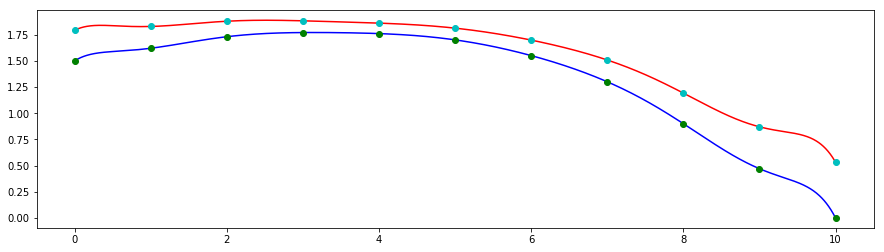

In [31]:
c_eval = np.linspace(0, 10, 1000)
y_6lag = lagrange(c, y_6, c_eval)
y_8lag = lagrange(c, y_8, c_eval)

plt.subplots(figsize=(15,4))
plt.plot(c_eval, y_6lag, 'b-')
plt.plot(c_eval, y_8lag, 'r-')
plt.plot(c, y_6, 'go')
plt.plot(c, y_8, 'co')

Este método de interpolación no es adecuado para represnetar geometrías, puesto que los artefactos numéricos debidos al método en los extremos del intervalo generan formas espureas que no corresponden a la froma real del casco. 

### Apartado (c)

Interpolamos ahora utilizando splines cúbicas. 

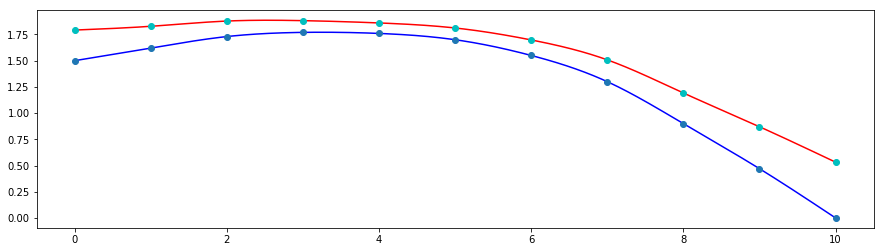

In [33]:
y_6cs = CubicSpline(c, y_6, bc_type='natural')
y_8cs = CubicSpline(c, y_8, bc_type='natural')

plt.subplots(figsize=(15,4))
plt.plot(c_eval, y_6cs(c_eval), 'b-')
plt.plot(c_eval, y_8cs(c_eval), 'r-')
plt.plot(c, y_6, 'o')
plt.plot(c, y_8, 'co')

Las curvas generadas con splines cúbicas se asemejan mucho más a las formas reales de un casco. 

### Apartado (d)

Incluimos ahora dos nuevas cuadernas en las que evaluamos la interpolación mediante splines cúbicas para obtener los nuevos nodos:

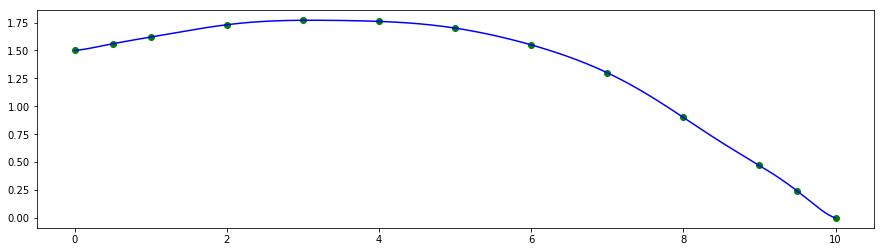

In [34]:
c_0o1  = y_6cs(0.5) 
c_9o10 = y_6cs(9.5)

c_new   = np.array([0, 0.5, 1., 2., 3., 4., 5., 6., 7., 8., 9., 9.5, 10.])
y_6_new = np.array([1.5, c_0o1, 1.62, 1.73, 1.77, 1.76, 1.7, 1.55, 1.3, 0.9, 0.47, c_9o10, 0.0])

plt.subplots(figsize=(15,4))
plt.plot(c_new, y_6_new, 'go')

y_6lag = lagrange(c_new, y_6_new, c_eval)
plt.plot(c_eval, y_6lag, 'b-')

La interpolación es ahora mucho más suave que la que se veía en el apartado (b). Distrubuir los nodos de manera que estén más juntos en los extremos del intervalo hace que nuestra distribución de nodos se parezca más a la de Chebyshev, que ya vimos en clase que da lugar a interpolaciones con menos artefactos numéricos. 

### Apartado (e)

Utilizamos la regla del trapecio para integrar las semimangas y obtener el área de la flotación:

In [35]:
def trapecio(fa, fb, h):
    return 0.5 * (fa + fb) * h

Area = 2. * np.sum(trapecio(y_6_new[:-1], y_6_new[1:], (c_new[1:]-c_new[:-1])))
print("El área de la flotación es : ",Area)

El área de la flotación es :  27.1035635359116
